In [5]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("ujjwalchowdhury/walmartcleaned")

print("Path to dataset files:", path)

print(os.listdir(path))

Using Colab cache for faster access to the 'walmartcleaned' dataset.
Path to dataset files: /kaggle/input/walmartcleaned
['walmart_cleaned.csv']


In [2]:
import pandas as pd

In [9]:
file_path = "/kaggle/input/walmartcleaned/walmart_cleaned.csv"
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
3,3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
4,4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315


In [10]:
df = df.drop(columns = ["Unnamed: 0"], axis = 1)

In [11]:
df[df.duplicated()]

,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size


In [12]:
df.describe().T.style.bar(subset = ["mean"], 
                          color = "#5fba7d").background_gradient(subset = ["std", "min", "25%", "50%", "75%", "max"],
                          cmap = "YlGnBu")

,count,mean,std,min,25%,50%,75%,max
Store,421570.000000,22.200546,12.785297,1.000000,11.000000,22.000000,33.000000,45.000000
IsHoliday,421570.000000,0.070358,0.255750,0.000000,0.000000,0.000000,0.000000,1.000000
Dept,421570.000000,44.260317,30.492054,1.000000,18.000000,37.000000,74.000000,99.000000
Weekly_Sales,421570.000000,15981.258123,22711.183519,-4988.940000,2079.650000,7612.030000,20205.852500,693099.360000
Temperature,421570.000000,60.090059,18.447931,-2.060000,46.680000,62.090000,74.280000,100.140000
Fuel_Price,421570.000000,3.361027,0.458515,2.472000,2.933000,3.452000,3.738000,4.468000
MarkDown1,421570.000000,2590.074819,6052.385934,0.000000,0.000000,0.000000,2809.050000,88646.760000
MarkDown2,421570.000000,879.974298,5084.538801,-265.760000,0.000000,0.000000,2.200000,104519.540000
MarkDown3,421570.000000,468.087665,5528.873453,-29.100000,0.000000,0.000000,4.540000,141630.610000
MarkDown4,421570.000000,1083.132268,3894.529945,0.000000,0.000000,0.000000,425.290000,67474.850000


In [13]:
pd.DataFrame(df.dtypes, columns= ["Types"]).T

,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Types,int64,object,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64


In [14]:
df["Date"] = pd.to_datetime(df["Date"])

In [15]:
df = df.set_index("Date")

In [16]:
df.sample(6)

,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,,
2011-09-09,25,1,5.0,7338.56,67.51,3.738,0.00,0.00,0.00,0.00,0.00,209.022556,7.274,2,128107
2011-05-06,40,0,1.0,15333.65,50.81,4.078,0.00,0.00,0.00,0.00,0.00,134.514367,4.781,3,155083
2011-02-18,12,0,12.0,5689.05,53.35,3.430,0.00,0.00,0.00,0.00,0.00,127.995250,14.021,2,112238
2012-09-07,36,1,93.0,15499.23,84.19,3.697,463.27,0.00,1.75,0.00,2480.20,221.118114,6.623,3,39910
2010-03-19,3,0,90.0,1240.84,60.42,2.720,0.00,0.00,0.00,0.00,0.00,214.530122,7.368,2,37392
2012-08-10,20,0,1.0,29240.93,75.40,3.722,16845.14,156.18,12.47,6921.28,6346.44,214.748459,7.280,3,203742


In [17]:
# Verify Date
assert df.index.dtype == "datetime64[ns]"

In [18]:
# Fix dtypes
df["Store"] = df["Store"].astype(int)
df["Dept"] = df["Dept"].astype(int)
df["IsHoliday"] = df["IsHoliday"].astype(bool)
df["Type"] = df["Type"].astype("category")

In [19]:
# Check missing vs zero markdowns
df[["MarkDown1","MarkDown2","MarkDown3","MarkDown4"]].describe()

,MarkDown1,MarkDown2,MarkDown3,MarkDown4
count,421570.000000,421570.000000,421570.000000,421570.000000
mean,2590.074819,879.974298,468.087665,1083.132268
std,6052.385934,5084.538801,5528.873453,3894.529945
min,0.000000,-265.760000,-29.100000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,2809.050000,2.200000,4.540000,425.290000
max,88646.760000,104519.540000,141630.610000,67474.850000


In [20]:
# Weekly sales of store
Sales_by_store = pd.Series(df.groupby("Store")["Weekly_Sales"].mean().round(2))
Sales_by_store.head()

,Weekly_Sales
Store,
1,21710.54
2,26898.07
3,6373.03
4,29161.21
5,5053.42


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Average Weekly Sales by Store')

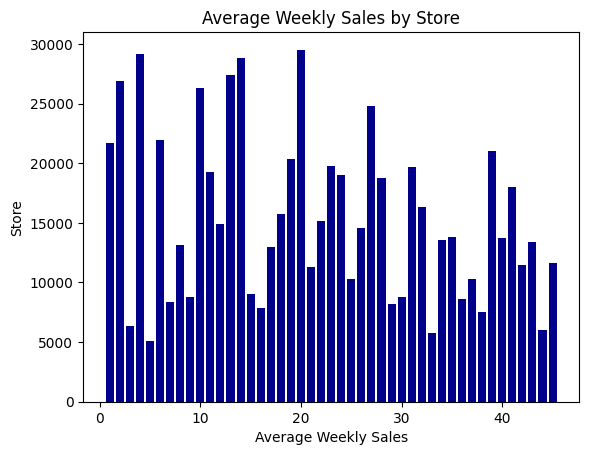

In [22]:
plt.bar(Sales_by_store.index, Sales_by_store.values, color = "darkblue")
plt.xlabel("Average Weekly Sales")
plt.ylabel("Store")
plt.title("Average Weekly Sales by Store")

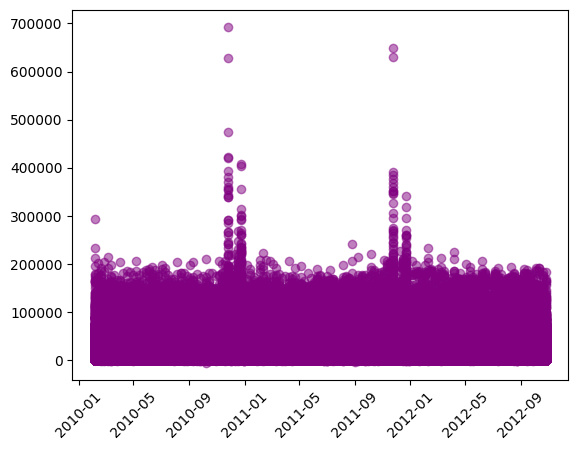

In [23]:
plt.scatter(df.index, df.Weekly_Sales, color = "purple", alpha = 0.5)
plt.xticks(rotation = 45)
plt.show()

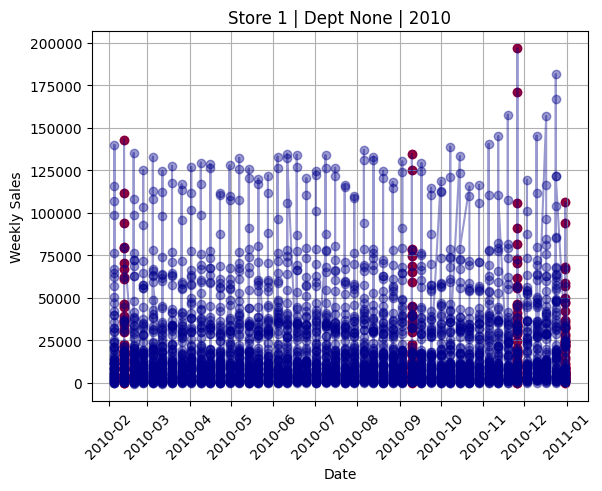

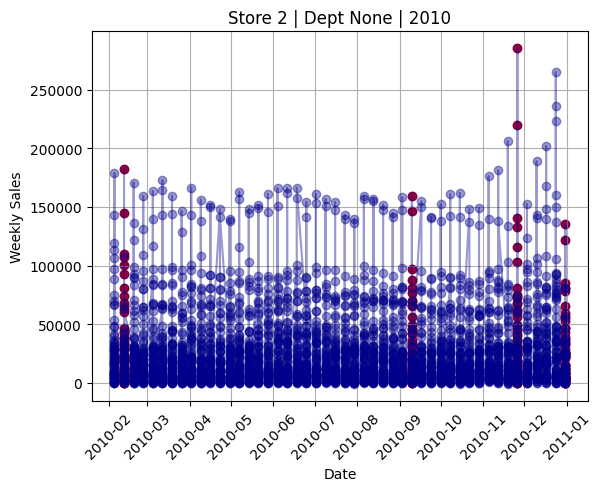

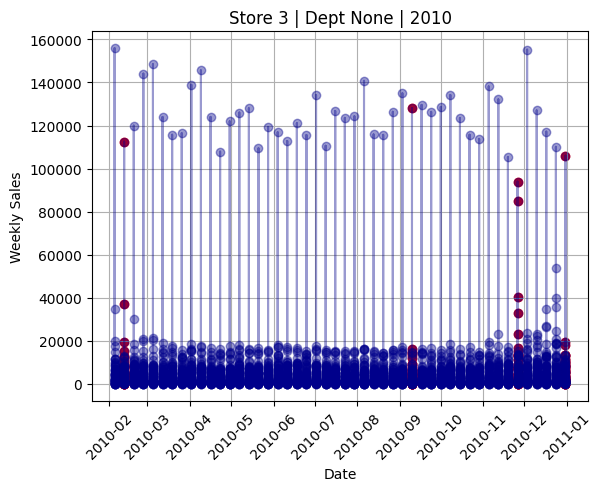

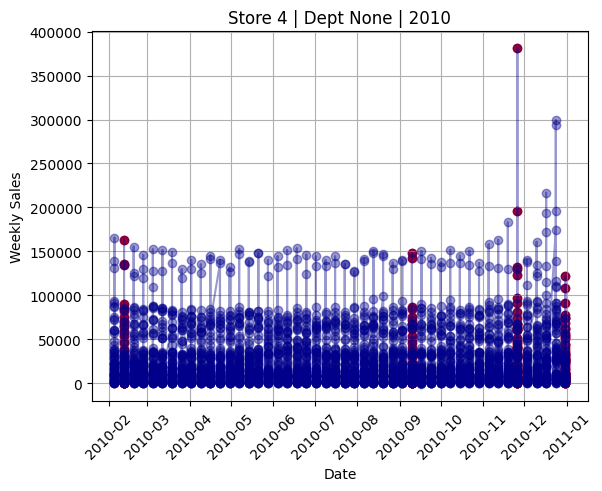

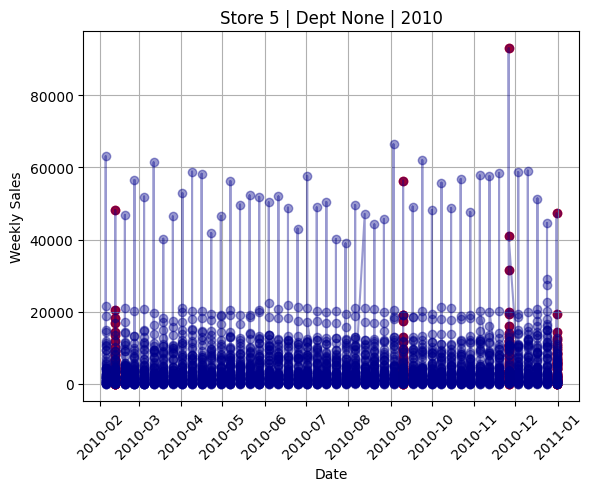

In [32]:
def get_store_sales(store_number=None, dept=None, year=None, month=None):
    """
        store_number 1 to 45
        dept range 1 to 99
        year 2010, 2011, 2012
        month 1 10 12
        Plots weekly sales for a given store number.
        Optionally filter by month and year.
    """
    data = df[((df["Store"] == store_number) if store_number is not None else True) & 
              ((df["Dept"] == dept) if dept is not None else True)]

    if year is not None:
        data = data[data.index.year == year]

    if month is not None:
        if year is None:
            raise ValueError("You cannot enter month without year")
        data = data[data.index.month == month]


    plt.plot(data.index, 
             data.Weekly_Sales, 
             marker = "o", 
             linestyle = "-", 
             color = "darkblue", 
             alpha = 0.4)
    
    plt.scatter(data[data["IsHoliday"] == True].index, 
                data[data["IsHoliday"] == True]["Weekly_Sales"], 
                color = "red", 
                label = "Holiday Weeks")
    
    title = f"Store {store_number} | Dept {dept}"
    if year:
        title += f" | {year}"
    if month:
        title += f" | Month {month}"

    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Weekly Sales")
    plt.xticks(rotation = 45)
    plt.grid()
    plt.show()


# get_store_sales(26, 18, year = 2010, month = 6)
for store in range(1, 6):
    # for dept in range(1, 4):
    get_store_sales(store, year = 2010)